# DS EDA Project
by Christian R.

## Prerequisites

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

# Don't hide any columns
pd.options.display.max_columns = None
# Default style
sns.set_style("white")

## Exploring the data

In [107]:
# Load the data from previously downloaded csv file
df = pd.read_csv("data/eda.csv")
df.head(15)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0
5,2014-05-12,1230000.0,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,3890.0,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0
6,2014-06-27,257500.0,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,1715.0,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0
7,2015-01-15,291850.0,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,1060.0,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0
8,2015-04-15,229500.0,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,1050.0,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0
9,2015-03-12,323000.0,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,1890.0,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

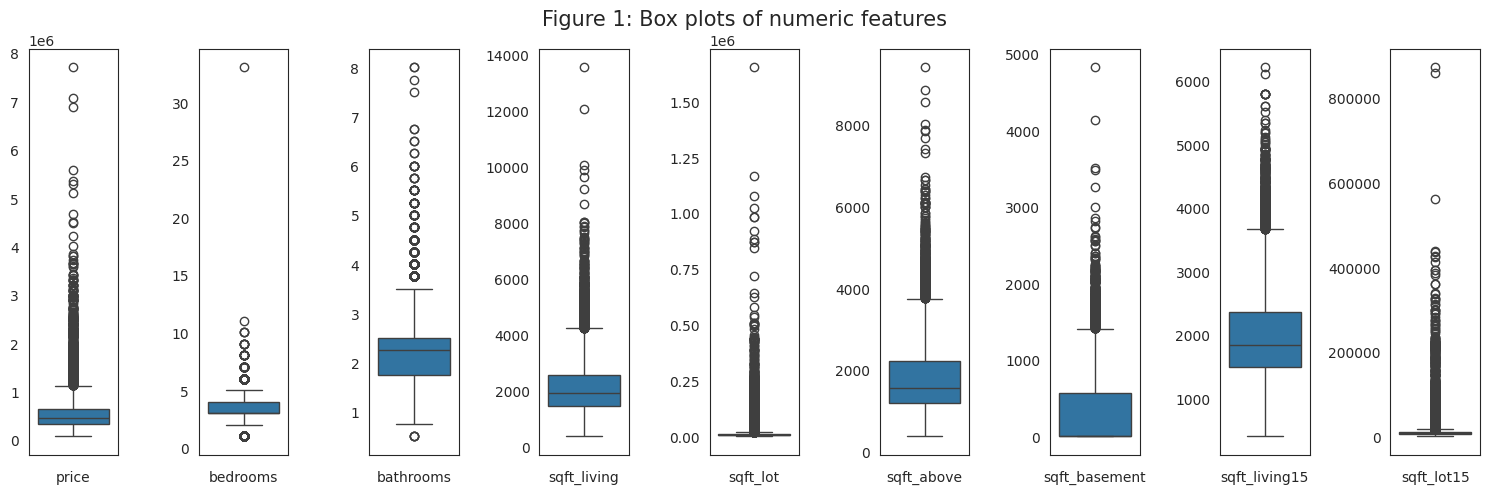

In [109]:
FEATURE_COLS_NUMERIC = [
    "price",
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_basement",
    "sqft_living15",
    "sqft_lot15",
]

fig, ax = plt.subplots(1, len(FEATURE_COLS_NUMERIC), figsize = (15,5))

# Print box plots for every numeric feature
fig.suptitle("Figure 1: Box plots of numeric features", fontsize=15)

for i,col in enumerate(FEATURE_COLS_NUMERIC):
    f = sns.boxplot(df[col], ax=ax[i])
    f.set_xlabel(col)
    f.set_ylabel(None)

fig.tight_layout()
plt.subplots_adjust(wspace = 0.9, top = 0.9)
plt.show()

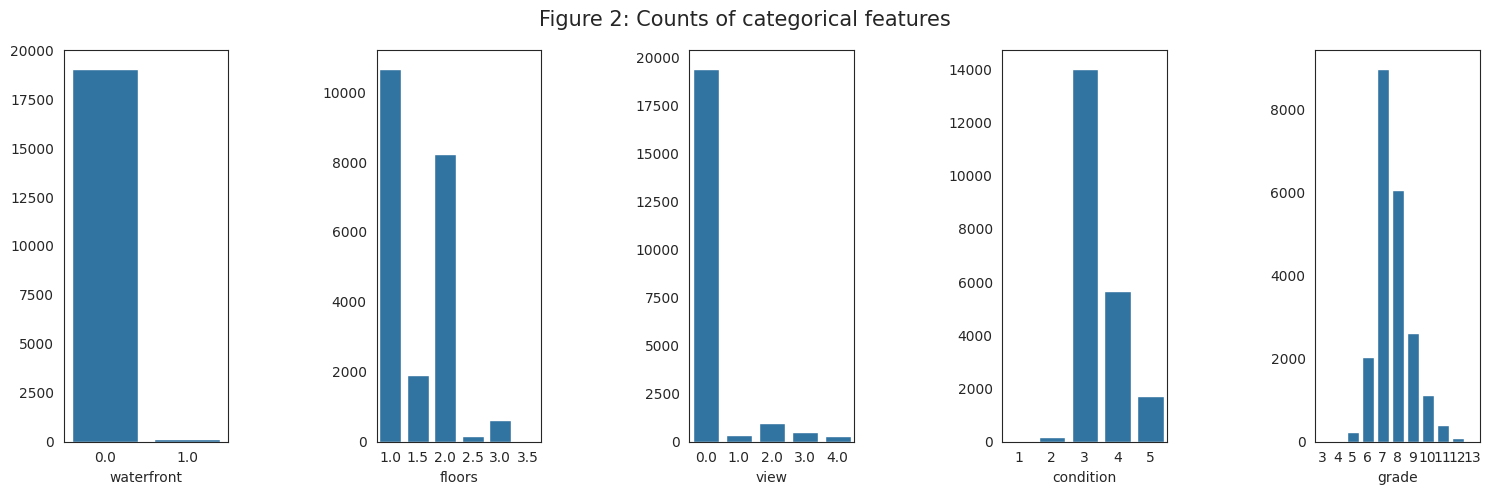

In [110]:
FEATURE_COLS_CATEGORICAL = [
    "waterfront",
    "floors",
    "view",
    "condition",
    "grade"
]

fig, ax = plt.subplots(1, len(FEATURE_COLS_CATEGORICAL), figsize = (15,5))

# Print histogram for every categorical feature
fig.suptitle("Figure 2: Counts of categorical features", fontsize=15)

for i,col in enumerate(FEATURE_COLS_CATEGORICAL):
    f = sns.countplot(df, x=col, ax=ax[i])
    f.set_xlabel(col)
    f.set_ylabel(None)

fig.tight_layout()
plt.subplots_adjust(wspace = 0.9, top = 0.9)
plt.show()

## Hypothesis

1. Locations at the waterfront are more expensive than those on the landsite.

2. Houses in areas more closer to the city center are more expensive than those farer away.

3. Locations closer to the city center are less family friendly than those farer away.

## Data Cleaning

### Converting data types and adding derived columns

The date column is of type object, so lets try to convert it to pandas data time and derive some more date columns from it.

In [111]:
# Convert to pandas datetime
df["sold_date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

# Add derived date columns
df["sold_year"] = df["sold_date"].dt.year
df["sold_month"] = df["sold_date"].dt.month
df["sold_weekday"] = df["sold_date"].dt.dayofweek

# Drop old column
df.drop("date", axis=1, inplace=True)

df[["sold_date", "sold_year", "sold_month", "sold_weekday"]].head(10)

,sold_date,sold_year,sold_month,sold_weekday
0,2014-10-13,2014,10,0
1,2014-12-09,2014,12,1
2,2015-02-25,2015,2,2
3,2014-12-09,2014,12,1
4,2015-02-18,2015,2,2
5,2014-05-12,2014,5,0
6,2014-06-27,2014,6,4
7,2015-01-15,2015,1,3
8,2015-04-15,2015,4,2
9,2015-03-12,2015,3,3


Lets have a look at the values in the *yr_renovated* and *yr_built* columns.

In [112]:
df["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

This one seems ok, but..

In [113]:
df["yr_renovated"].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

*yr_renovated* has wrong scale and type. Lets fix it by division and conversion to integer:

In [114]:
df["yr_renovated"] = (df["yr_renovated"] / 10).astype("Int64")

We also like to have columns bringing the **house price in relation to the living- and lot space**.

In [115]:
# The sum of living and lot spaces (total space)
df["sqft_total"] = df["sqft_living"] + df["sqft_lot"]
# The price divided by total space
df["price_per_sqft_total"] = df["price"] / df["sqft_total"]
# The price divided by living space
df["price_per_sqft_living"] = df["price"] / df["sqft_living"]
# The price divided by lot space
df["price_per_sqft_lot"] = df["price"] / df["sqft_lot"]

df[["price", "sqft_living", "sqft_lot", "sqft_total", "price_per_sqft_total", "price_per_sqft_living", "price_per_sqft_lot"]].head(10)

,price,sqft_living,sqft_lot,sqft_total,price_per_sqft_total,price_per_sqft_living,price_per_sqft_lot
0,221900.0,1180.0,5650.0,6830.0,32.489019,188.050847,39.274336
1,538000.0,2570.0,7242.0,9812.0,54.830819,209.338521,74.288870
2,180000.0,770.0,10000.0,10770.0,16.713092,233.766234,18.000000
3,604000.0,1960.0,5000.0,6960.0,86.781609,308.163265,120.800000
4,510000.0,1680.0,8080.0,9760.0,52.254098,303.571429,63.118812
5,1230000.0,5420.0,101930.0,107350.0,11.457848,226.937269,12.067105
6,257500.0,1715.0,6819.0,8534.0,30.173424,150.145773,37.762135
7,291850.0,1060.0,9711.0,10771.0,27.095906,275.330189,30.053548
8,229500.0,1780.0,7470.0,9250.0,24.810811,128.932584,30.722892
9,323000.0,1890.0,6560.0,8450.0,38.224852,170.899471,49.237805


For a better reading experience we also can sort the columns alphabetically:

In [116]:
df = df[sorted(df.columns)]

### Scouting for missing or duplicate values

<Axes: >

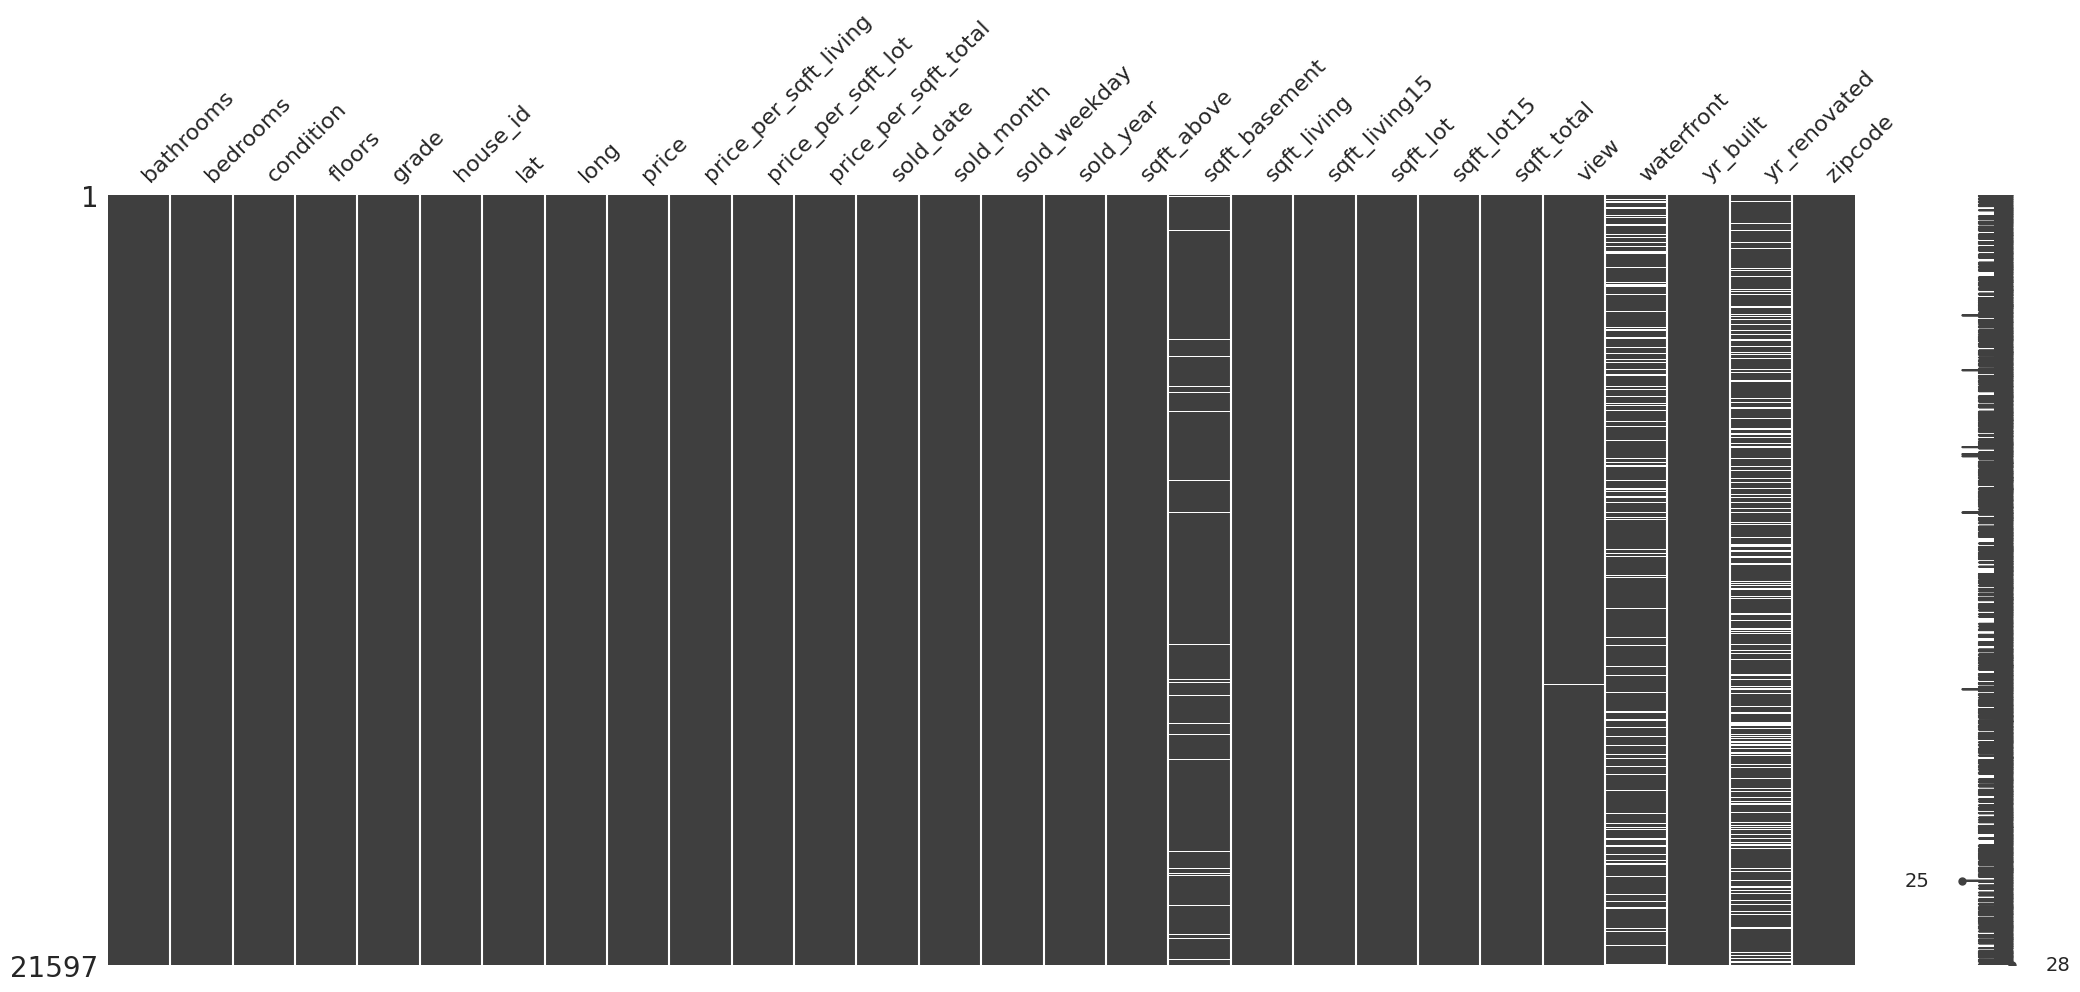

In [117]:
msno.matrix(df)

There are some missing values in the waterfront, yt_renovated and sqft_basement columns. We might be able to imput the missing data, but it is not feasable in a short period of time.

In [118]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

Luckily we din't find any duplicate rows.

## Relationships

Let's have a look at the correlation matrix:

<Axes: >

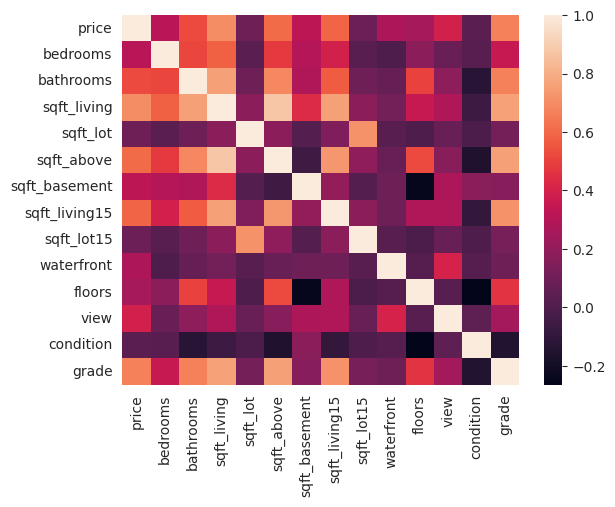

In [119]:
correlation_matrix = df[FEATURE_COLS_NUMERIC + FEATURE_COLS_CATEGORICAL].corr()
sns.heatmap(correlation_matrix)

In [120]:
# Make series from corr. matrix
s = correlation_matrix.abs().unstack()
# Filter self-correlated pairs and sort
s.where(s < 1).sort_values(ascending=False).head(20)

sqft_living    sqft_above       0.876448
sqft_above     sqft_living      0.876448
grade          sqft_living      0.762779
sqft_living    grade            0.762779
               sqft_living15    0.756402
sqft_living15  sqft_living      0.756402
sqft_above     grade            0.756073
grade          sqft_above       0.756073
sqft_living    bathrooms        0.755758
bathrooms      sqft_living      0.755758
sqft_above     sqft_living15    0.731767
sqft_living15  sqft_above       0.731767
sqft_lot15     sqft_lot         0.718204
sqft_lot       sqft_lot15       0.718204
grade          sqft_living15    0.713867
sqft_living15  grade            0.713867
sqft_living    price            0.701917
price          sqft_living      0.701917
sqft_above     bathrooms        0.686668
bathrooms      sqft_above       0.686668
dtype: float64

The correlation matrix reveals several relations. Some of seem trivial, for example the tuple `(price, sqft_living, 0.701917)`. It shows that for more living space, we also have to pay more. `(grade, sqft_living, 0.762779)` says the grade of a house grows with its living space. Other interesting relations are `(sqft_living, sqft_living15, 0.756402)` and `(sqft_lot, sqft_lot15, 0.718204)`. They show that the sizes of house and lot correlate with the ones in the nearby-neighborhood.


## Basic considerations

Now, let's have a look at the client. I chose Larry Sanders, who is looking for a house for himself and his **kids**. It must reside on the **waterfront**, in a **nice** and **isolated** but also **central** neighborhood **without kids**. Larry has a **limited budget**.

- Since larry has kids, we can assume that his house at least needs three bedrooms, one for himself and at least two for the kids. Further constraints could be a minimum living space.

- Only houses on the waterfront are being considered. Houses explicitly not on the waterfront or without any knowledge of it will be discarded

- The new home has to be central, so this will limit us either to a certain set of zipcodes or to a maximum search radius from the city center.

- Since larry has a limited budget, it is reasonable to find criteria, which have influence on the price. This could be the size of the house and lot, the renovation status, the neighborhood, the grade of the house or the time to buy.

- Larry wants a nice neighborhood. So how do define this? Interesting features/relations might be the AVG(grade) or the AVG(price) in an area.

- He also wants an isolated area and without kids, so we need a an area which is not family friendly. We might derive this from features like the number of bedroom, sqft_living, sqft_lot, sqft_living15 or sqft_lot15.

## Review of the assumptions

### Locations at the waterfront are more expensive than those on the landsite

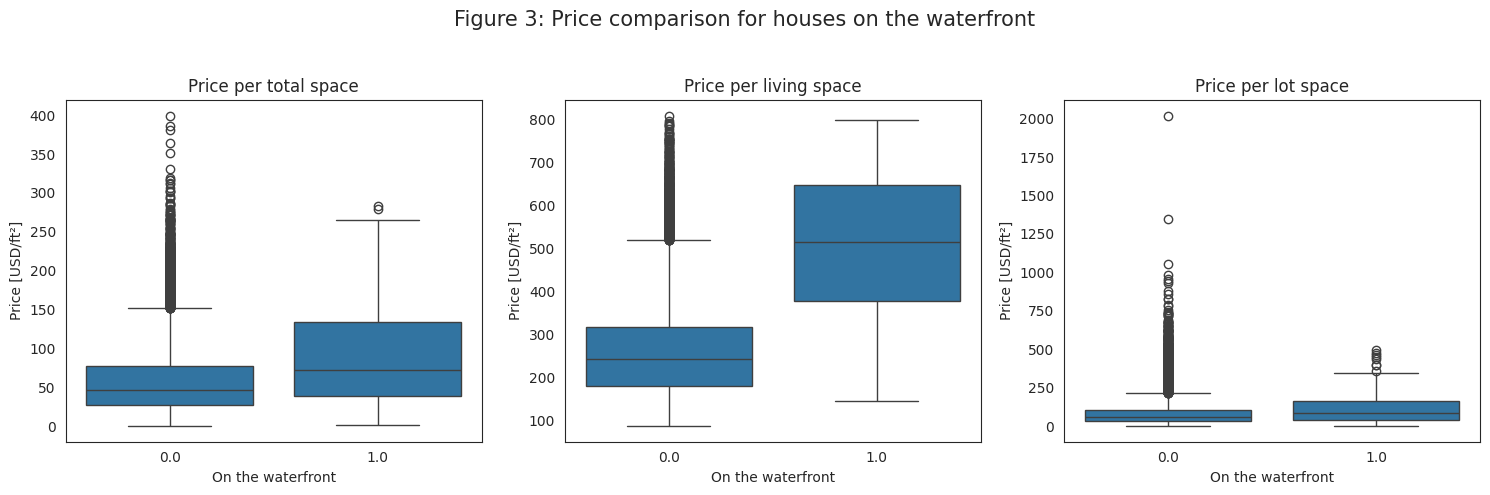

In [121]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle("Figure 3: Price comparison for houses on the waterfront", fontsize=15)

f1 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_total"], ax=ax[0])
f1.set_xlabel("On the waterfront")
f1.set_ylabel("Price [USD/ft²]", fontsize = 10)
f1.set_title("Price per total space", fontsize = 12)

f2 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_living"], ax=ax[1])
f2.set_xlabel("On the waterfront")
f2.set_ylabel("Price [USD/ft²]", fontsize = 10)
f2.set_title("Price per living space", fontsize = 12)

f3 = sns.boxplot(x = df["waterfront"], y = df["price_per_sqft_lot"], ax=ax[2])
f3.set_xlabel("On the waterfront")
f3.set_ylabel("Price [USD/ft²]", fontsize = 10)
f3.set_title("Price per lot space", fontsize = 12)

fig.tight_layout()
plt.subplots_adjust(wspace = .2, top = 0.8)
plt.show()

Figure 3 shows that there is little difference in prices when considering the size of the living space and lot combined. But if we just consider the living space, there is a significant difference in the mean price of about **250 USD/ft²** between houses lying on the waterfront and those which don't. This comparison anyway is a little bit fuzzy, because there are about 19000 houses without and only 146 ones with waterfront.

### Houses in areas more closer to the city center are more expensive than those farer away

To gather this knowledge, we make use of a geographical plot. First, we build the median price of all houses in a certain area - in this case the zipcode is being used for that purpose. When then determine the Q25 and Q75 quantiles. Regions where the median house price is below Q25 are marked green, prices within the IQR are orange and everything higher than Q75 is marked red.

In [123]:
SPACE_NEEDLE_COORDS = [47.620422, -122.349358]
MAP_WIDTH = 800
MAP_HEIGHT = 600

# Get the q25 and q75 quantiles
q25 = df[["price_per_sqft_living", "sqft_living"]].quantile(0.25)
q75 = df[["price_per_sqft_living", "sqft_living"]].quantile(0.75)

def map_price_to_color(price):
    if price < q25["price_per_sqft_living"]:
        return "green"
    if price < q75["price_per_sqft_living"]:
        return "orange"
    return "red"

def map_space_to_icon(space):
    if space < q25["sqft_living"]:
        return "s"
    if space < q75["sqft_living"]:
        return "m"
    return "l"

# Aggregate data over zipcodes
map_df = df.groupby("zipcode").agg(
    lat=("lat", "mean"), 
    long=("long", "mean"), 
    price=("price_per_sqft_living", "median"),
    space=("sqft_living", "median"),
    count=("house_id", "count")
)

# Create the map
m = folium.Map(
    location = SPACE_NEEDLE_COORDS, 
    zoom_start = 10,
    scrollWheelZoom = False
)
# Wrap the map with a figure
f = folium.Figure(width=MAP_WIDTH, height=MAP_HEIGHT).add_child(m)

# Mark seattle space needle as city center
folium.Marker(
    location=SPACE_NEEDLE_COORDS, 
    icon=folium.Icon(prefix="fa", icon="house", color="black"),
    tooltip="Seattle Space Needle"
).add_to(m)

# Create a marker for every zipcode
for index, row in map_df.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]], 
        icon=folium.Icon(
            prefix="fa", icon=map_space_to_icon(row["space"]), color=map_price_to_color(row["price"])
        ), 
        tooltip=f"{int(row['count'])} object(s)<br/>" +
                f"Zipcode: {index}<br/>"
                f"Price: <b>{round(row['price'])} $/ft²</b><br/>" +
                f"Space: <b>{round(row['space'])} ft²</b>"
    ).add_to(m)

# Plot the map
f


From the map markers we can infer, that houses closer to the city center are way more expensive than the ones in the greater area.

### Locations closer to the city center are less family friendly than those farer away.

## Conclusion and suggestions

Geoplot mit Zipcodes (+Legende)<br>
Schauen wo die fehlenden Waterfronts (N/As ) auf der Karte sind.<br>
Möglichst große Grundstücke um Ruhe zu haben<br>
Avg number of bedrooms/bathrooms low in zip<br>
add readme